# **SENTIMENT ANALYSIS**
Sentiment analysis, or opinion mining, is the process of analyzing large volumes of text to determine whether it expresses a positive sentiment, a negative sentiment or a neutral sentiment. Sentiment analysis enables companies with vast troves of unstructured data to analyze and extract meaningful insights from it quickly and efficiently. Sentiment analysis uses natural language processing (NLP) and machine learning (ML) technologies to train computer software to analyze and interpret text in a way similar to humans. The software uses one of two approaches, rule-based or ML—or a combination of the two known as hybrid.

### **Importing Libraries**

In [8]:
import numpy as np
import pandas as pd
import re
import nltk
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
%matplotlib inline
warnings.filterwarnings('ignore')

### **Importing Dataset**
*'Amazon_Unlocked_Mobile.csv'* is publicly available dataset with 'CC0: Public Domain' license which is available on kaggle.com, it has over 400 thousand reviews of unlocked mobile phones sold on Amazon.com to find out insights with respect to reviews, ratings, price and their relationships.
Link: https://www.kaggle.com/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones/data

In [9]:
df = pd.read_csv("./Amazon_Unlocked_Mobile.csv")
df.shape

(413840, 6)

### **Data Exploration and Data Preprocessing**
We will conduct a sentiment analysis of the product reviews using 'Reviews' and 'Ratings' as our basis. Generally, higher ratings indicate a positive sentiment, while lower ratings suggest a negative one. For our analysis, we will classify ratings of 4 or 5 as positive and ratings of 1, 2, or 3 as negative. It's important to note that reviews may contain both positive and negative sentiments. We will create a df['Sentiment'] field based on this classification to build a machine learning model using algorithms such as Naive Bayes."

In [10]:
df.sample(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
5362,Apple iPhone 3GS 16GB (White) - AT&T,Apple,53.00,1,"First of all the phone was not an iPhone 3GS ,...",0.0
316359,Samsung Galaxy J5 J500M 8GB Unlocked GSM 4G LT...,Samsung,177.49,5,I absolutely love my J5. I got in Gold and it'...,1.0
358064,Samsung Galaxy S5 SM-G900H 16GB Factory Unlock...,Samsung,369.99,5,The package arrived at a very fast rate and pr...,0.0
55251,Apple iPhone 6 Plus 128GB Factory Unlocked GSM...,NaN,699.95,5,The large screen with the accesibilites option...,0.0
352555,Samsung Galaxy S5 Mini G800h 16gb Hspa+ Unlock...,Samsung,2000.00,3,This is NOT dual sim like I thought when purch...,0.0
378703,Samsung Knack U310 Flip Phone for Verizon Wire...,Samsung,259.99,5,Good replacement phone,0.0
241980,Mophie Juice Pack Helium Charging Case - iPhone 5,mophie,64.26,5,Protects the phone and almost doubles the up-t...,3.0
161886,BLU VIVO 5R Refresh Smartphone - 5.5-Inch Disp...,BLU,199.95,5,Amazing phone has everything you need from a $...,1.0
256423,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,45.00,5,Was happy with the product and delivered on ti...,0.0
85585,Blackberry 9320 Curve Unlocked GSM Quad-Band S...,BlackBerry,49.88,5,nnnm mmnmm mnmnm mnnm mnmnm mnmnmn mnmnmn mnn ...,0.0


In [11]:
#Before Data CLeaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [12]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

### __*Data Cleaning Strategy*__
Column 'Product Name' and 'Ratings' have no null values so leave them as is. Only 348669 have value in column 'Brand Name', replace null values in the column with 'Unknown'. Replace null values in 'Review Votes' column with 0. Replace null values in Price column with average price of that brand. Ratings and Reviews are critical in sentiment analysis. Therefore drop the rows which have null values in those columns.

In [13]:
#df['Brand Name'].fillna('Unknown', inplace=True)
#df['Review Votes'].fillna(0, inplace=True)
df.fillna({'Brand Name':'Unknown'},inplace = True)
df.fillna({'Review Votes':0},inplace = True)
average_price = df.groupby('Brand Name')['Price'].mean()
df['Price'] = df.apply(lambda row: average_price[row['Brand Name']] if pd.isna(row['Price']) else row['Price'], axis=1)
df['Brand Name'] = df['Brand Name'].apply(lambda x: x.lower())
df.dropna(inplace=True)

In [14]:
#After Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413581 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413581 non-null  object 
 1   Brand Name    413581 non-null  object 
 2   Price         413581 non-null  float64
 3   Rating        413581 non-null  int64  
 4   Reviews       413581 non-null  object 
 5   Review Votes  413581 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 22.1+ MB


In [15]:
df.isnull().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [16]:
df.describe()

,Price,Rating,Review Votes
count,413581.000000,413581.000000,413581.000000
mean,227.103068,3.820163,1.461523
std,271.227009,1.547895,9.030771
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,149.350000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


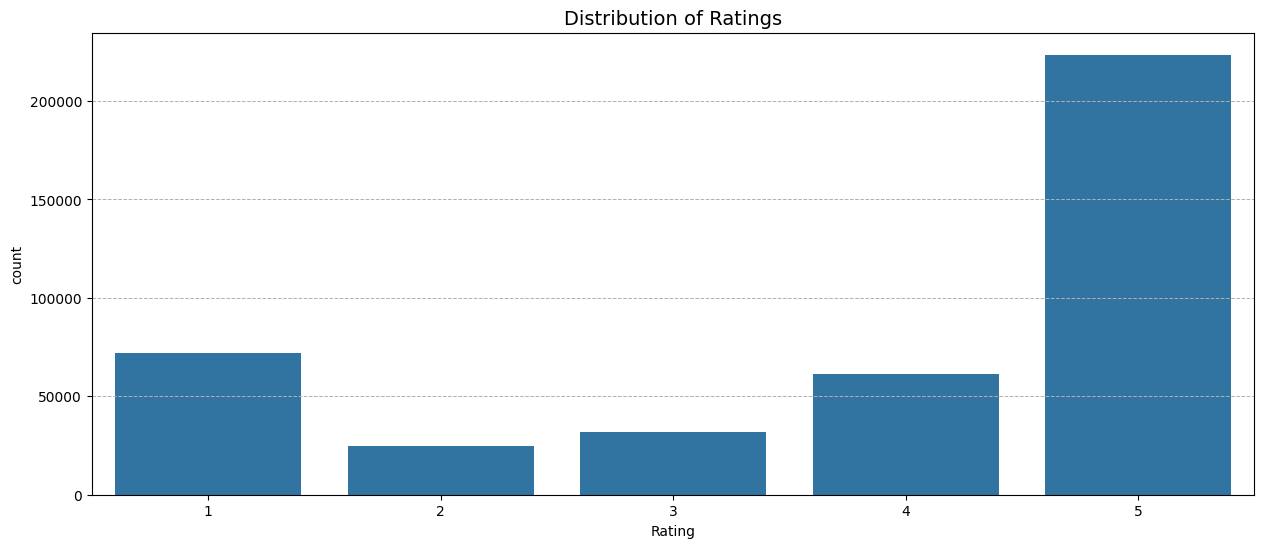

In [17]:
plt.figure(figsize = (15,6))
sns.countplot(x=df['Rating'])

plt.title('Distribution of Ratings',fontsize=14)
plt.grid(True, which = 'Major' ,axis = 'y', linestyle ='--', linewidth = 0.7)

**The rating distribution chart shows a strong positive skew, with the majority of reviews being 5-star, indicating that most users rated products highly. There is a noticeable but much smaller portion of 1-star ratings, reflecting a significant number of dissatisfied customers. Ratings of 4-stars are present but are fewer in comparison to 5-stars, and the 2-star and 3-star ratings are the least frequent, suggesting that users tend to have polarized opinions rather than moderate ones(either very positive or very negative).**

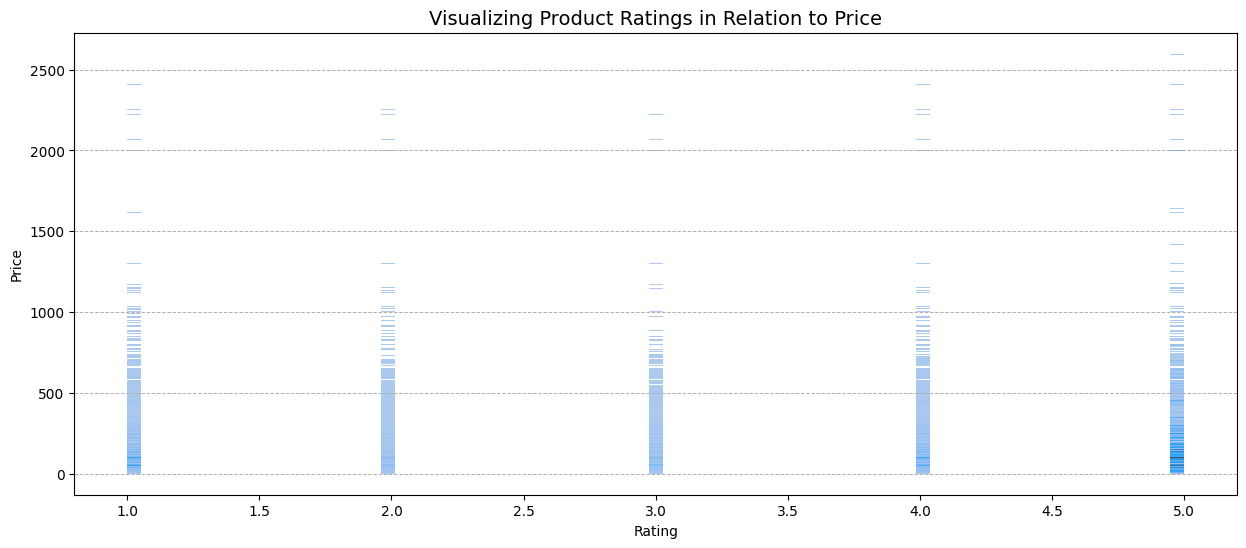

In [18]:
plt.figure(figsize = (15,6))
sns.histplot(x=df['Rating'], y = df['Price'])

plt.title('Visualizing Product Ratings in Relation to Price',fontsize=14)
plt.grid(True, which = 'Major' ,axis = 'y', linestyle ='--', linewidth = 0.7)
plt.show()

**The scatter plot shows no strong correlation between product price and rating. Most products, regardless of rating, are priced below $500. Higher-priced items are scattered across all rating levels, indicating that price does not strongly influence product rating in this dataset.**

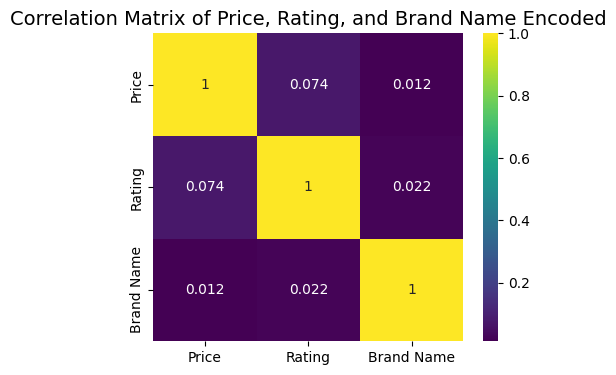

In [19]:
corr_col = ['Price','Rating']
df_corr = df[corr_col]
label_encoder = LabelEncoder()
df_corr['Brand Name'] = label_encoder.fit_transform(df['Brand Name'])
corr = df_corr.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr,annot = True, cmap = 'viridis')
plt.title('Correlation Matrix of Price, Rating, and Brand Name Encoded', fontsize=14)
plt.show()

This correlation matrix shows the relationships between "Price," "Rating," and "Brand Name":
1. Price and Rating (0.074): The correlation between Price and Rating is low (close to zero), indicating a weak or negligible relationship. This suggests that the price of the product does not significantly impact the rating given by customers in this dataset. People may give high or low ratings regardless of the product’s price.

2. Price and Brand Name (0.012): The correlation between Price and Brand Name is almost zero, meaning there's essentially no relationship between the price and the brand names encoded. In other words, brand identity (as encoded here) doesn't seem to drive significant differences in price.

3. Rating and Brand Name (0.022): The correlation between Rating and Brand Name is also very low. This implies that customer ratings are not strongly influenced by the brand (at least as represented in this encoding). Customers rate products independently of brand identity in this dataset.

**All correlation values are close to zero, indicating minimal linear relationships between these variables. This analysis suggests that factors like Price and Brand Name don't have a strong direct impact on Ratings in this dataset. Customer ratings seem to depend more on product reviews in 'Reviews' column**

### **_Data Preprocessing_**
We will conduct a sentiment analysis of the product reviews using 'Reviews' and 'Ratings' as our basis. Generally, higher ratings indicate a positive sentiment, while lower ratings suggest a negative one. For our analysis, we will classify ratings of 4 or 5 as positive and ratings of 1, 2, or 3 as negative. It's important to note that reviews may contain both positive(1) and negative(0) sentiments. We will create a df['Sentiment'] field based on this classification to build a machine learning model using algorithms such as Naive Bayes.

In [20]:
df = df.drop(['Product Name', 'Brand Name','Price', 'Review Votes'], axis=1)
df.sample(10)

,Rating,Reviews
81790,5,Great phone. Very reliable. ASUS doesn't seem ...
381859,3,Decent phone depending on who you get it for. ...
349622,4,"Just got my new phone and so far, so good. It ..."
17784,5,Absolutely wonderful!
412843,5,"Excellent phone and excellent seller, :)"
215832,4,Very Good Smartphone with amazing Headphone Mu...
369506,5,Like it
141606,4,What's on the box ?????
262942,1,"Hi Everyone,I would 've given -ve rating if it..."
22583,5,All I can say about this phone is that I am ha...


In [21]:
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x>=4 else 0)
df.sample(10)

,Rating,Reviews,Sentiment
241472,4,Very good telephone. Convenient price. I used ...,1
275367,4,"Great phone for the pricePros:great camera,pre...",1
259047,4,The phone feels very nice in hand. It looks fl...,1
101490,5,The memo feature is the best in this phone,1
84842,1,"I need my money back, my cellphone works but a...",0
103359,4,This little fella haz more than what he's name...,1
311323,5,Thank You !,1
81277,5,"FYI, this is a really subjective review. Anywa...",1
245562,5,"Very nice phone, it feels high quality, gets i...",1
146996,3,I didn't really like it. But before I get into...,0


In [22]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase the text
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing
df['Reviews'] = df['Reviews'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Reviews'], df['Sentiment'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### **Naive Bayes Model**

In [23]:
# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Fit the model to the training data using the TF-IDF feature representation
# X_train_tfidf contains the features (TF-IDF vectors) of the training set,
# while y_train contains the corresponding sentiment labels (target values).
nb_model.fit(X_train_tfidf, y_train)

# Use the trained model to make predictions on the test data
# X_test_tfidf contains the TF-IDF vectors for the test set,
# and nb_predictions will hold the predicted sentiment labels.
nb_predictions = nb_model.predict(X_test_tfidf)

### **Model Evaluation of Naive Bayes**

Accuracy: 0.89
Confusion Matrix:
 [[18228  7624]
 [ 1740 55125]]


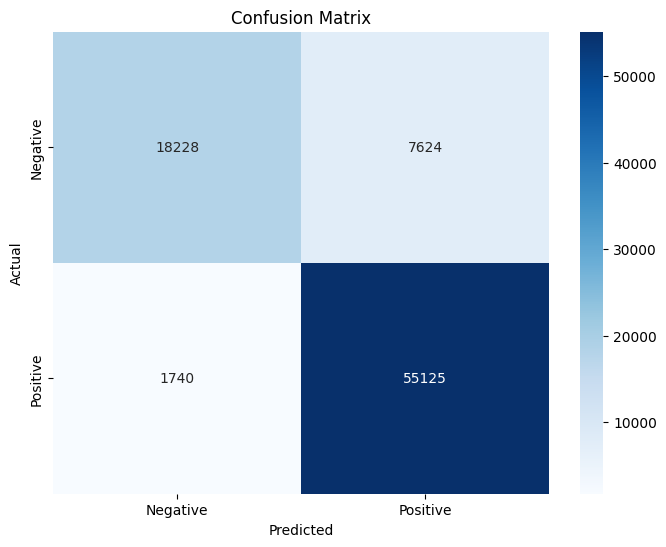

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80     25852
           1       0.88      0.97      0.92     56865

    accuracy                           0.89     82717
   macro avg       0.90      0.84      0.86     82717
weighted avg       0.89      0.89      0.88     82717



In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, nb_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, nb_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report for detailed metrics
report = classification_report(y_test, nb_predictions)
print("Classification Report:\n", report)

### **Logistic Regression**

In [25]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Fit the model to the training data using the TF-IDF feature representation
# X_train_tfidf contains the features (TF-IDF vectors) of the training set,
# while y_train contains the corresponding sentiment labels (target values).
lr_model.fit(X_train_tfidf, y_train)

# Use the trained model to make predictions on the test data
# X_test_tfidf contains the TF-IDF vectors for the test set,
# and lr_predictions will hold the predicted sentiment labels.
lr_predictions = lr_model.predict(X_test_tfidf)

### **Model Evaluation of Logistic Regression**

Accuracy: 0.92
Confusion Matrix:
 [[21664  4188]
 [ 2790 54075]]


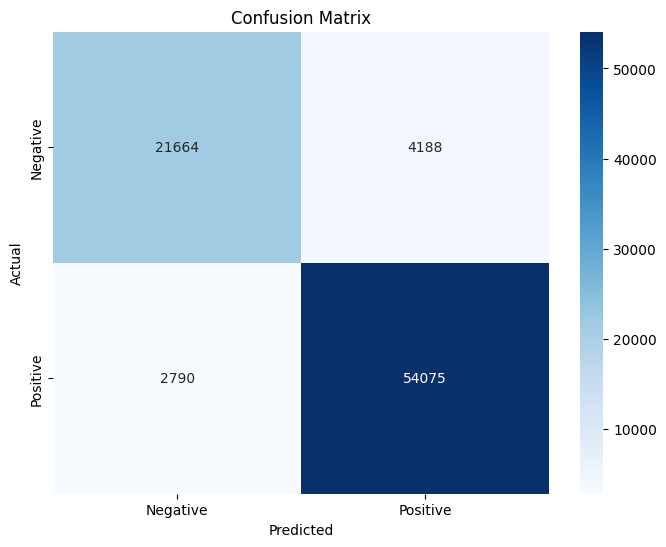

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86     25852
           1       0.93      0.95      0.94     56865

    accuracy                           0.92     82717
   macro avg       0.91      0.89      0.90     82717
weighted avg       0.91      0.92      0.91     82717



In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, lr_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, lr_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report for detailed metrics
report = classification_report(y_test, lr_predictions)
print("Classification Report:\n", report)

## **Using the trained models to predict sentiments in new product reviwes**
We can use the above trained Naive Bayes and Logistic Regression models to predict the sentiments in new product reviews.

In [27]:
# New reviews
new_reviews = [
    "I absolutely loved this product!",
    "This is the worst purchase I’ve ever made.",
    "It’s okay, not what I expected."
]
# Preprocess the new reviews
processed_reviews = [preprocess_text(review) for review in new_reviews] 
# Convert to TF-IDF
new_reviews_tfidf = vectorizer.transform(processed_reviews)
# Make predictions
nb_predictions = nb_model.predict(new_reviews_tfidf)
lr_predictions = lr_model.predict(new_reviews_tfidf)

output_df = pd.DataFrame({
    'Review': new_reviews,
    'Naive_Bayes_Prediction': nb_predictions,
    'Logistic_Regression_Prediction': lr_predictions
})
output_df

,Review,Naive_Bayes_Prediction,Logistic_Regression_Prediction
0,I absolutely loved this product!,1,1
1,This is the worst purchase I’ve ever made.,0,0
2,"It’s okay, not what I expected.",1,0
